# Recommended-anime
## Dataset: https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database

Berikut adalah beberapa langkah yang dapat Anda lakukan dalam bagian "Data Understanding":

1. **Deskripsi Data**: Mulailah dengan memberikan deskripsi umum tentang data Anda. Ini bisa mencakup jumlah baris dan kolom, jenis data (numerik atau kategorikal), dan informasi lainnya yang relevan.

2. **Eksplorasi Awal**: Gunakan metode statistik deskriptif untuk mendapatkan pemahaman awal tentang data Anda. Ini bisa mencakup mean, median, modus, standar deviasi, dan lainnya. Anda juga dapat mencari nilai null atau missing values dalam data Anda.

3. **Visualisasi Data**: Buatlah beberapa plot untuk membantu Anda memahami data. Ini bisa mencakup histogram, boxplot, scatterplot, heatmap korelasi, dan lainnya. Visualisasi ini dapat membantu Anda melihat distribusi data, hubungan antar variabel, dan outlier.

4. **Analisis Fitur**: Analisis setiap fitur dalam dataset Anda. Apakah fitur tersebut numerik atau kategorikal? Apakah ada missing values? Bagaimana distribusinya? Apakah ada outlier? Bagaimana korelasi antara fitur ini dengan fitur lainnya?

5. **Insight Awal**: Berdasarkan eksplorasi dan visualisasi yang telah Anda lakukan, apa insight awal yang dapat Anda peroleh? Apakah ada pola tertentu? Apakah ada fitur yang tampaknya akan sangat berpengaruh dalam model Anda nanti?


# Import library

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data Understanding

## Deskripsi Data

In [2]:
df_anime = pd.read_csv('dataset/anime.csv')

In [3]:
# Lihat 5 baris pertama dari dataset
print(df_anime.head())

   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  


In [4]:
# Ukuran Data
print(f'Jumlah Baris: {df_anime.shape[0]}')
print(f'Jumlah Kolom: {df_anime.shape[1]}')

Jumlah Baris: 12294
Jumlah Kolom: 7


In [5]:
# Fitur Data
print(f'Fitur: {df_anime.columns.tolist()}')

Fitur: ['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members']


Berikut adalah penjelasan singkat tentang fitur-fitur tersebut:

- `anime_id`: ID unik dari myanimelist.net yang mengidentifikasi anime.
- `name`: Nama lengkap anime.
- `genre`: Daftar genre untuk anime ini, dipisahkan oleh koma.
- `type`: Jenis anime (misalnya, film, TV, OVA, dll.).
- `episodes`: Jumlah episode dalam acara ini (1 jika film).
- `rating`: Rata-rata rating dari semua pengguna di database myanimelist.net.
- `members`: Jumlah anggota komunitas yang berada dalam "grup" anime ini.

In [6]:
# Tipe Data
print(f'Tipe Data:\n{df_anime.dtypes}')

Tipe Data:
anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object


## Eksplorasi Awal

In [7]:
# Ubah episodes ke numerik dan handle error dengan mengubahnya menjadi NaN
df_anime['episodes'] = pd.to_numeric(df_anime['episodes'], errors='coerce')

# Mengisi NaN dengan 0 atau nilai yang diinginkan
df_anime['episodes'] = df_anime['episodes'].fillna(0)

# Mengubah tipe data menjadi int64
df_anime['episodes'] = df_anime['episodes'].astype('int64')


In [8]:
# Lihat statistik deskriptif dari dataset
print(df_anime.describe())

           anime_id      episodes        rating       members
count  12294.000000  12294.000000  12064.000000  1.229400e+04
mean   14058.221653     12.040101      6.473902  1.807134e+04
std    11455.294701     46.257299      1.026746  5.482068e+04
min        1.000000      0.000000      1.670000  5.000000e+00
25%     3484.250000      1.000000      5.880000  2.250000e+02
50%    10260.500000      2.000000      6.570000  1.550000e+03
75%    24794.500000     12.000000      7.180000  9.437000e+03
max    34527.000000   1818.000000     10.000000  1.013917e+06


In [9]:
# Missing Values
print("\nMissing Values:")
print(df_anime.isnull().sum())


Missing Values:
anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64


di beberapa kolom terjadi missing values

In [10]:
# Mengisi missing values pada kolom 'genre' dengan 'Unknown'
df_anime['genre'] = df_anime['genre'].fillna('Unknown')

In [11]:
# Mengisi missing values pada kolom 'type' dengan modus (nilai yang paling sering muncul)
df_anime['type'] = df_anime['type'].fillna(df_anime['type'].mode()[0])

In [12]:
# Mengisi missing values pada kolom 'rating' dengan median
df_anime['rating'] = df_anime['rating'].fillna(df_anime['rating'].median())

In [13]:
# Cek kembali missing values
print(df_anime.isnull().sum())

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64


Missing values sudah diperbaiki

## Visualisasi Data

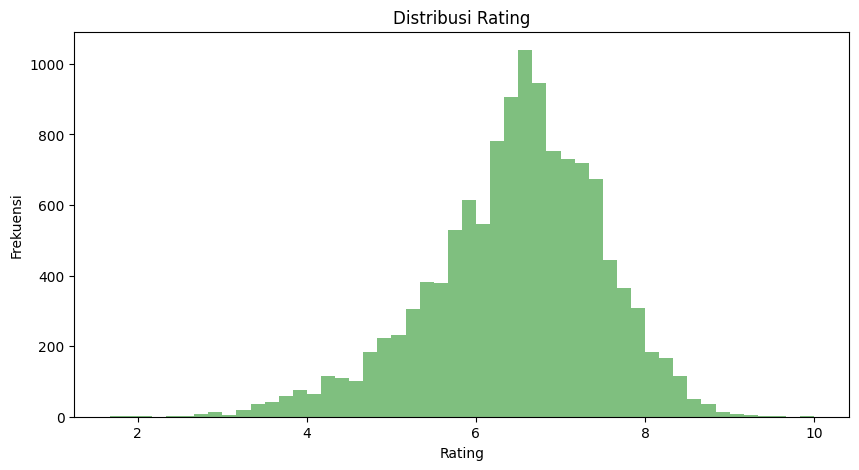

In [15]:
# Histogram untuk kolom 'rating'
plt.figure(figsize=(10,5))
plt.hist(df_anime['rating'].dropna(), bins=50, alpha=0.5, color='g')
plt.title('Distribusi Rating')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.show()

Histogram tersebut menunjukkan distribusi rating anime dalam dataset. Dari histogram tersebut, dapat melihat bahwa rating paling umum berada di sekitar 6 hingga 8. Terdapat juga beberapa anime dengan rating di bawah 6 dan di atas 8, tetapi jumlahnya lebih sedikit. Ini menunjukkan bahwa sebagian besar anime memiliki rating yang cukup tinggi, dengan sebagian kecil yang memiliki rating sangat tinggi atau sangat rendah. 

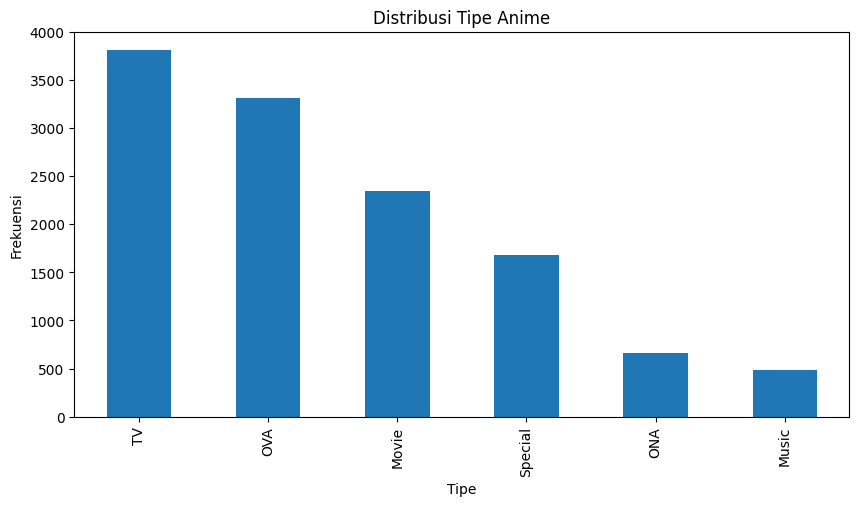

In [16]:
# Bar plot untuk kolom 'type'
plt.figure(figsize=(10,5))
df_anime['type'].value_counts().plot(kind='bar')
plt.title('Distribusi Tipe Anime')
plt.xlabel('Tipe')
plt.ylabel('Frekuensi')
plt.show()

Grafik batang tersebut menunjukkan distribusi tipe anime dalam dataset. Dari grafik tersebut, dapat melihat bahwa tipe anime yang paling umum adalah TV, diikuti oleh OVA dan Movie. Tipe anime Special dan ONA memiliki jumlah yang lebih sedikit, sementara Music adalah tipe anime dengan jumlah terkecil. Ini menunjukkan bahwa sebagian besar anime dalam dataset adalah tipe TV, OVA, atau Movie.

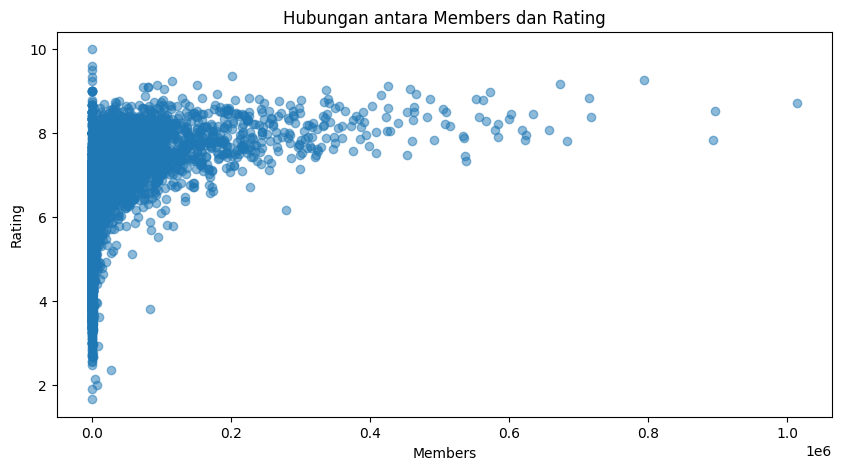

In [17]:
# Scatter plot antara 'members' dan 'rating'
plt.figure(figsize=(10,5))
plt.scatter(df_anime['members'], df_anime['rating'], alpha=0.5)
plt.title('Hubungan antara Members dan Rating')
plt.xlabel('Members')
plt.ylabel('Rating')
plt.show()

Grafik scatter plot tersebut menunjukkan hubungan antara jumlah anggota (`members`) dan rating anime. Dari grafik tersebut, dapat melihat bahwa sebagian besar data terkonsentrasi di area dengan jumlah anggota rendah dan rating tinggi. Ini menunjukkan bahwa sebagian besar anime memiliki rating yang cukup tinggi meskipun jumlah anggotanya relatif rendah.

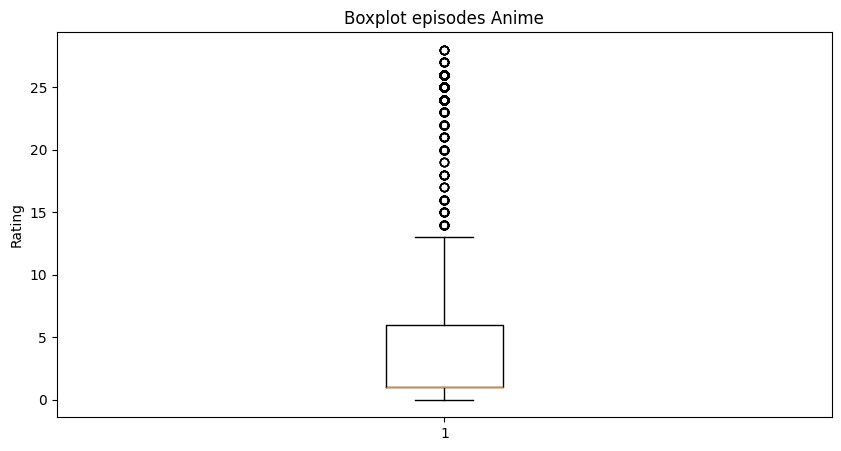

In [30]:
# Buat boxplot untuk kolom 'episodes'
plt.figure(figsize=(10,5))
plt.boxplot(df_anime['episodes'].dropna())
plt.title('Boxplot episodes Anime')
plt.ylabel('Rating')
plt.show()

Dari boxplot yang Anda tunjukkan, tampaknya ada beberapa outliers dalam kolom `episodes`.

In [27]:
# Hitung Q1, Q3, dan IQR untuk kolom 'episodes'
Q1 = df_anime['episodes'].quantile(0.25)
Q3 = df_anime['episodes'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan batas atas untuk outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Ganti outliers dengan NaN
df_anime['episodes'] = np.where((df_anime['episodes'] < lower_bound) | (df_anime['episodes'] > upper_bound), np.nan, df_anime['episodes'])

# Mengisi NaN dengan median
df_anime['episodes'] = df_anime['episodes'].fillna(df_anime['episodes'].median())

Outliers di kolom episodes sudah diperbaiki

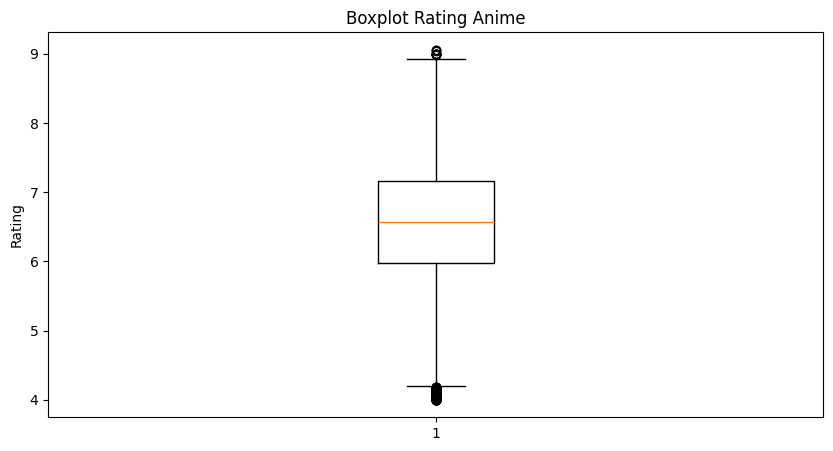

In [29]:
# Buat boxplot untuk kolom 'rating'
plt.figure(figsize=(10,5))
plt.boxplot(df_anime['rating'].dropna())
plt.title('Boxplot Rating Anime')
plt.ylabel('Rating')
plt.show()

Dari boxplot yang Anda tunjukkan, tampaknya ada beberapa outliers dalam kolom `rating`.

In [28]:
# Hitung Q1, Q3, dan IQR untuk kolom 'rating'
Q1 = df_anime['rating'].quantile(0.25)
Q3 = df_anime['rating'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan batas atas untuk outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Ganti outliers dengan NaN
df_anime['rating'] = np.where((df_anime['rating'] < lower_bound) | (df_anime['rating'] > upper_bound), np.nan, df_anime['rating'])

# Mengisi NaN dengan median
df_anime['rating'] = df_anime['rating'].fillna(df_anime['rating'].median())

Outliers di kolom rating sudah diperbaiki

## Analisis Fitur